In [1]:
# Este trecho é para harmonizar a execução com ou sem o Google Colab e o Drive com arquivos sincronizado
try:
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)
    root_dir = "/content/gdrive/My Drive/"
    base_dir = root_dir + 'Colab Notebooks/rnap/PyTorch/'
except ImportError:
    base_dir = ""

# Exercício Regressão Linear com PyTorch (Solução)

Este notebook é a solução do exercício do notebook:
- [LinearRegressionIris-Tensor.ipynb](LinearRegressionIris-Tensor.ipynb)

Procure fazer o exercício sem olhar a solução, apenas venha olhar após tentar
a solução por vários minutos.

## Importação dos pacotes

In [2]:
%matplotlib inline
import torch

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)
import numpy as np
np.random.seed(1234)


## Dataset

### Leitura dos dados

In [3]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = torch.FloatTensor(data[:,0:1])
y_train = torch.FloatTensor(data[:,1:2])

n_samples = x_train.size(0)
print('x_train.shape:',x_train.shape, type(x_train))
print('y_train.shape:',y_train.shape, type(y_train))

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: torch.Size([50, 1]) <class 'torch.Tensor'>
y_train.shape: torch.Size([50, 1]) <class 'torch.Tensor'>
x_train[:5]:
 tensor([[7.0000],
        [6.4000],
        [6.9000],
        [5.5000],
        [6.5000]])
y_train[:5]:
 tensor([[4.7000],
        [4.5000],
        [4.9000],
        [4.0000],
        [4.6000]])


### Normalização dos dados

In [4]:
xt_min = x_train.min()
xt_max = x_train.max()
x_train_n = (x_train - xt_min)/(xt_max - xt_min)

yt_min = y_train.min()
yt_max = y_train.max()
y_train_n = (y_train - yt_min)/(yt_max - yt_min)

Text(0,0.5,'Comprimento petalas')

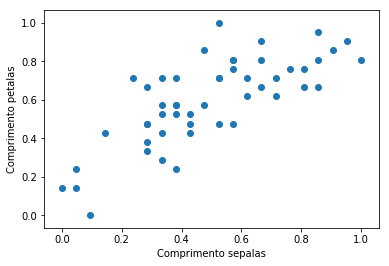

In [5]:
plt.scatter(x_train_n,y_train_n)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

### Exercício 1 - criação do `x_train_bias`

faça o `x_train_bias` ser uma matriz com zeros na primeira coluna e x_train na segunda coluna.

Dica: você pode precisar da função [torch.cat](http://pytorch.org/docs/master/torch.html#torch.cat) e [torch.ones](http://pytorch.org/docs/master/torch.html#torch.ones).

In [6]:
x_train_bias = torch.cat((torch.ones(n_samples, 1), x_train_n), dim=1)
print(x_train_bias.size())

torch.Size([50, 2])


## Modelo da rede

### Definição da classe

In [7]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = torch.Tensor(n_out, n_in)
        self.w.uniform_(-0.1,0.1) #inicialização dos parâmetros

    
    def forward(self, x_bias):
        return x_bias.matmul(self.w.t())
    

### Instanciando a rede

In [8]:
model = Net(2,1)

### Testando o predict da rede

In [9]:
#model.forward(torch.ones((4,2)))
model.forward(torch.randn(4,2))

tensor([[-0.1034],
        [ 0.0705],
        [-0.0052],
        [-0.0229]])

## Treinamento

### Exercício 2 - Treinamento

Refaça o código de treinamento da rede, mas agora utilizando somente Tensores do PyTorch. Faça o mesmo procedimento que o notebook [LinearRegressionIrisNumPy](LinearRegressionIrisNumPy.ipynb). Para consultar as operações disponíveis no PyTorch use a [documentação do PyTorch](http://pytorch.org/docs/master/torch.html).

Funções que podem ser úteis:
- torch.t
- torch.mean
- torch.matmul

In [10]:
num_epochs = 100
learning_rate = 0.5

for epoch in range(num_epochs):
    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = torch.mean((y_pred - y_train_n)**2)
    
    # cálculo do gradiente pelas derivadas parciais
    weight_grad = (2.0/n_samples) * x_train_bias.t().matmul(x_train_bias.matmul(model.w.t()) - y_train_n)
    
    # gradiente descendente
    model.w = model.w - learning_rate * weight_grad.t()
    
    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

Epoch[20/100], loss: 0.022786
Epoch[40/100], loss: 0.021403
Epoch[60/100], loss: 0.021203
Epoch[80/100], loss: 0.021174
Epoch[100/100], loss: 0.021170


## Avaliação

### Predict

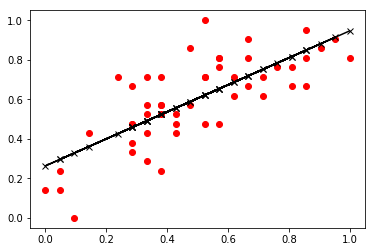

In [11]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train_n, y_train_n, 'ro', label='Original data')
plt.plot(x_train_n, y_pred, 'kx-', label='Fitting Line')
plt.show()

### Parâmetro treinado

In [12]:
print(model.w)

tensor([[0.2630, 0.6832]])


### Avaliação da perda

In [13]:
loss = ((y_pred - y_train_n)**2).mean()
loss

tensor(0.0212)

### Valor ótimo, solução analítica

In [14]:
x_bias = x_train_bias
y = y_train_n
w_opt = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
print(w_opt.t())

tensor([[0.2613, 0.6865]])


## Exercício

Observe que o valor final da perda não foi exatamente o mesmo que feito pelo notebook utilizando NumPy. 
Modifique este notebook para que seu resultado seja estritamente igual ao do NumPy.